In [1]:
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
import scipy.linalg as dense_linalg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid')

# Set up example vector potential and magnetic field

In 1D solution to Laplace equation is: $V = m x+b$

Let's take $3x+2$ on a grid from $-5$ to $5$. 

Boundary conditions: Neumann: $3$, Dirichlet $-13$ at $x=-5$ and $17$ at $x=5$.

### Setup Line

In [2]:
x = np.linspace(-5, 5, 11)

delta = x[1] - x[0]

### Set up Laplace problem with Dirichlet boundaries

Build the matrix and b vector for the $Ax=b$ problem.

In [3]:
b_vector = np.zeros(x[1:-1].shape)
b_vector[0] += -(-13)
b_vector[-1] += -(17)
b_vector = b_vector.ravel()

In [4]:
shape = x[1:-1].shape
matrix = sparse.diags((-2, 1, 1), (0, -1, 1), shape=(shape[0], shape[0]))

### Check rank and condition number to see if matrix is invertible

In [5]:
np.linalg.cond(matrix.toarray())

39.863458189061276

In [6]:
1/(np.finfo(x.dtype).eps)

4503599627370496.0

In [7]:
np.linalg.matrix_rank(matrix.toarray())

9

In [11]:
matrix.toarray().shape

(9, 9)

In [13]:
matrix.toarray()

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

### Solve linear algebra equation 

In [9]:
solution = dense_linalg.solve(matrix.toarray(), b_vector)
solution = solution.reshape(shape)

In [10]:
V = np.zeros(11)
V[0] = -13
V[-1] = 17
V[1:-1] = solution

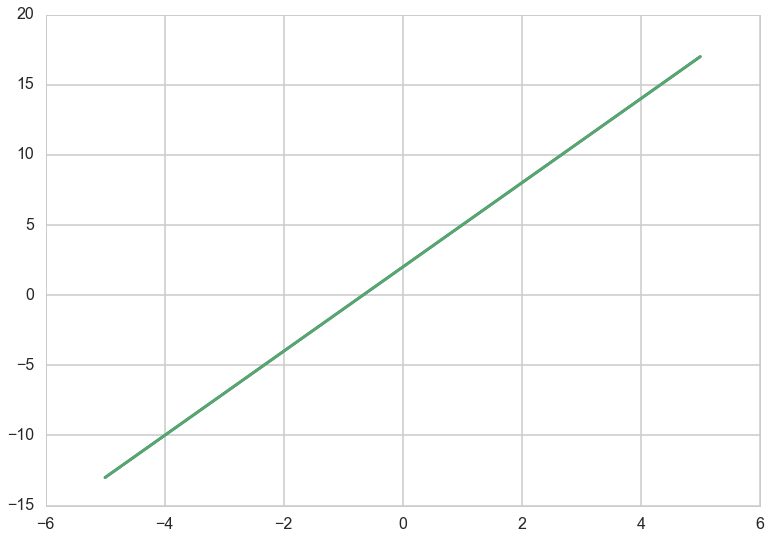

In [38]:
plt.plot(x, V)
plt.plot(x, 3*x+2)

# Now repeat with Neuman boundary conditions

Build the matrix and b vector for the $Ax=b$ problem.

In [29]:
b_vector = np.zeros(x.shape)
b_vector[0] += 2./delta*3
b_vector[-1] += -2./delta*3
b_vector = b_vector.ravel()

In [43]:
shape = x.shape
matrix = sparse.diags((-2, 1, 1), (0, -1, 1), 
                       shape=(shape[0], shape[0]))

for i, offset in enumerate(matrix.offsets[1:]):
    if offset < 0:
        matrix.data[i+1, offset-1] = 1.
    elif offset > 0:
        matrix.data[i+1, offset] = 2.
matrix = matrix*1./delta**2.

In [44]:
matrix.toarray()

array([[-2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -2.]])

## The matrix should be singular, the rank and condition number indicate this

In [45]:
np.linalg.matrix_rank(matrix.toarray())

10

In [46]:
np.linalg.cond(matrix.toarray())

84205050545854496.0

In [47]:
matrix.toarray().shape

(11, 11)

## Solve Laplace 

In [48]:
solution = dense_linalg.solve(matrix.toarray(), b_vector)

LinAlgError: singular matrix

# Tie down one end (Neumann boundary on one side, Dirichlet on other side)

In [60]:
b_vector = np.zeros(x.shape[0]-1)
b_vector[0] += 2./delta*3
b_vector[-1] += -(17)
b_vector = b_vector.ravel()

shape = x.shape[0]-1
matrix = sparse.diags((-2, 1, 1), (0, -1, 1), 
                       shape=(shape, shape))


matrix.data[2][1] = 2. 
print matrix.toarray()

[[-2.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.]]


### Now matrix is no longe singular

In [61]:
np.linalg.matrix_rank(matrix.toarray())

10

In [62]:
np.linalg.cond(matrix.toarray())

167.01829427254918

In [63]:
matrix.toarray().shape

(10, 10)

## Solve Laplace 

In [66]:
solution = np.zeros(x.shape[0])
solution[:-1] = dense_linalg.solve(matrix.toarray(), b_vector)
solution[-1] = 17

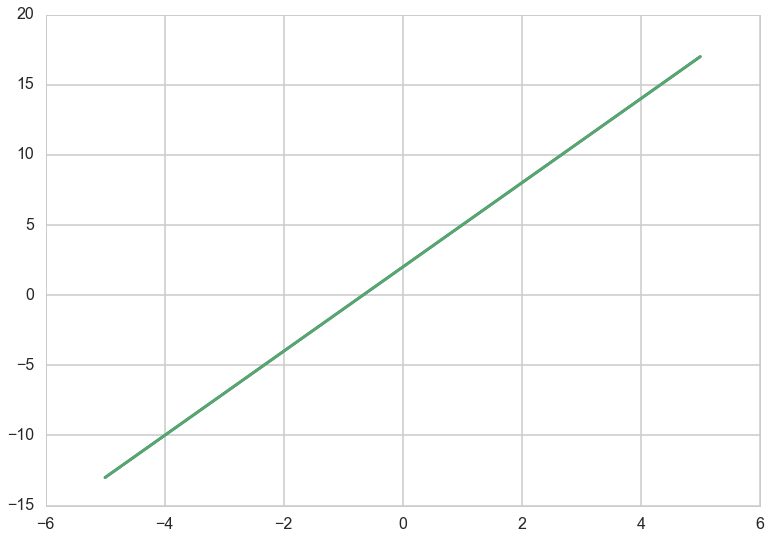

In [68]:
plt.plot(x, solution)
plt.plot(x, 3*x+2)